Process time for image 1: 0.3048 seconds
Process time for image 2: 0.5631 seconds
Process time for image 3: 0.3582 seconds
Process time for image 4: 0.2551 seconds
Process time for image 5: 0.6010 seconds
Process time for image 6: 4.3301 seconds
Process time for image 7: 1.8097 seconds
Process time for image 8: 6.0557 seconds
Process time for image 9: 2.9069 seconds
Process time for image 10: 5.4666 seconds
Average process time: 2.2651 seconds


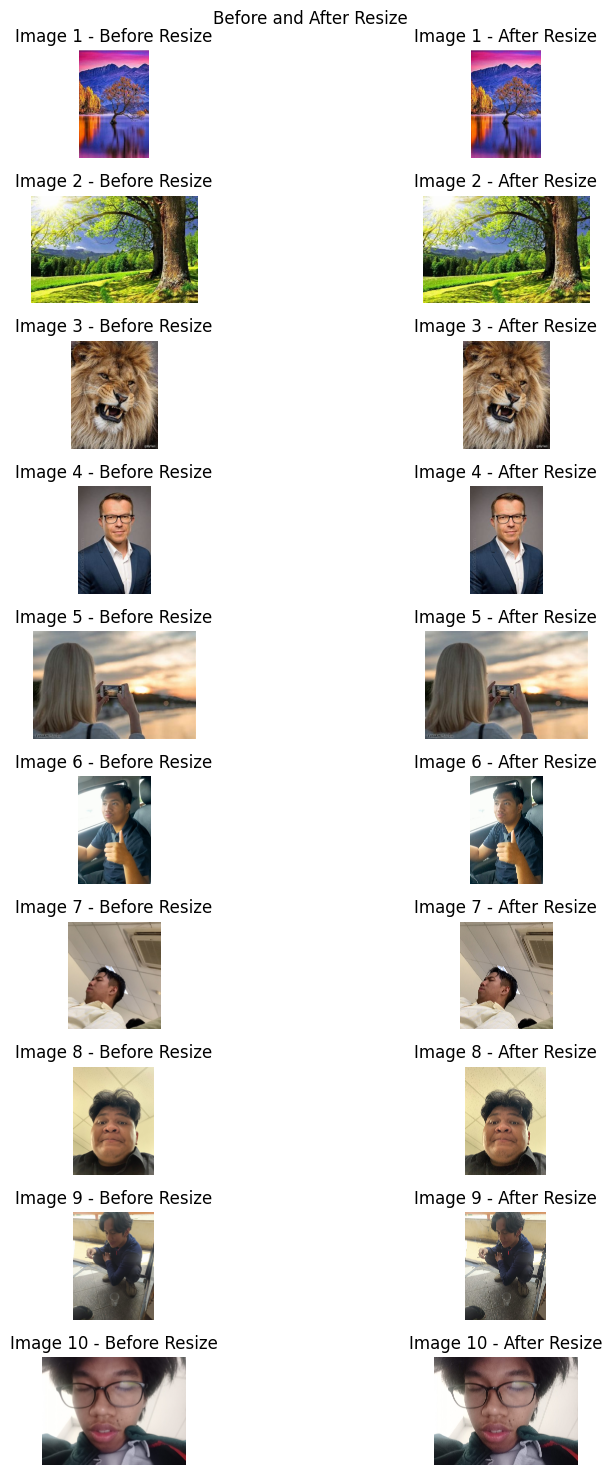

In [2]:
import concurrent.futures
import cv2
import os
import time
import matplotlib.pyplot as plt

def resize_image(input_path, output_dir, size_factor):
    try:
        start_time = time.time()
        original_image = cv2.imread(input_path)
        if original_image is None:
            print(f"Error: Gambar tidak ditemukan di {input_path}")
            return None, None, None, None

        # Determine new size based on size factor
        new_width = int(original_image.shape[1] * size_factor)
        new_height = int(original_image.shape[0] * size_factor)
        new_size = (new_width, new_height)

        # Use cubic interpolation
        resized_image = cv2.resize(original_image, new_size, interpolation=cv2.INTER_CUBIC)

        # Generate unique output file name based on timestamp
        timestamp = int(time.time())
        filename = os.path.basename(input_path)
        name, ext = os.path.splitext(filename)
        output_path = os.path.join(output_dir, f"{name}_{timestamp}{ext}")

        cv2.imwrite(output_path, resized_image)

        process_time = time.time() - start_time
        return original_image, resized_image, process_time, output_path
    except Exception as e:
        print(f"Error processing {input_path}: {e}")
        return None, None, None, None

def process_image(args):
    input_path, output_dir, size_factor = args
    return resize_image(input_path, output_dir, size_factor)

def main():
    input_dir = "C:/Users/ARIEL/Documents/Kuliah/Semester.4/Kompar/Tubes/Pictures"
    output_dir = "C:/Users/ARIEL/Documents/Kuliah/Semester.4/Kompar/Tubes/OutputImage"

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    resize_choice = input("Masukkan faktor resize (misalnya 2 untuk 2x, 0.5 untuk 0.5x): ")
    try:
        size_factor = float(resize_choice)
        if size_factor <= 0:
            raise ValueError("Faktor resize harus lebih besar dari 0")
    except ValueError as e:
        print(f"Error: {e}")
        return

    num_iterations = 10
    total_process_time = 0
    process_times = []
    before_images = []
    after_images = []

    input_paths = [os.path.join(input_dir, f"image_{i+1}.jpg") for i in range(num_iterations)]
    args = [(input_paths[i], output_dir, size_factor) for i in range(num_iterations)]

    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(process_image, args))

    for i, result in enumerate(results):
        original_image, resized_image, process_time, output_path = result

        if original_image is not None and resized_image is not None:
            before_images.append(original_image)
            after_images.append(resized_image)

            process_times.append(process_time)
            total_process_time += process_time

            print(f"Process time for image {i+1}: {process_time:.4f} seconds")

    average_process_time = total_process_time / num_iterations
    print(f"Average process time: {average_process_time:.4f} seconds")

    fig, axes = plt.subplots(num_iterations, 2, figsize=(10, 15))
    fig.suptitle('Before and After Resize')

    for i in range(num_iterations):
        original_image = cv2.cvtColor(before_images[i], cv2.COLOR_BGR2RGB)
        resized_image = cv2.cvtColor(after_images[i], cv2.COLOR_BGR2RGB)

        axes[i, 0].imshow(original_image)
        axes[i, 0].set_title(f"Image {i+1} - Before Resize")
        axes[i, 0].axis('off')

        axes[i, 1].imshow(resized_image)
        axes[i, 1].set_title(f"Image {i+1} - After Resize")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
    


In [6]:
import concurrent.futures
import cv2
import os
import time

print(os.getpid())

def resize_image(batch, size_factor):
    resized_images = []
    original_images = []
    batch_process_time = 0
    for input_path in batch:
        start_time = time.time()
        original_image = cv2.imread(input_path)
        if original_image is None:
            print(f"Error: Image not found at {input_path}")
            continue
  
        new_width = int(original_image.shape[1] * size_factor)
        new_height = int(original_image.shape[0] * size_factor)
        new_size = (new_width, new_height)

        resized_image = cv2.resize(original_image, new_size, interpolation=cv2.INTER_CUBIC)
        resized_images.append(resized_image)
        original_images.append(original_image)

        process_time = time.time() - start_time
        batch_process_time += process_time
        print(f"Process time for {os.path.basename(input_path)}: {process_time:.4f} seconds")

    return original_images, resized_images, batch_process_time

def get_image_paths(input_dir, num_images):
    return [os.path.join(input_dir, f"image_{i+1}.jpg") for i in range(num_images)]

def create_output_directory(output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

def save_resized_images(results, output_dir, batch_size):
    for i, batch_result in enumerate(results):
        original_images, resized_images, _ = batch_result
        for j, resized_image in enumerate(resized_images):
            output_path = os.path.join(output_dir, f"image_{i*batch_size+j+1}_Paralel.jpg")
            cv2.imwrite(output_path, resized_image)

def main():
    input_dir = "C:/Users/ARIEL/Documents/Kuliah/Semester.4/Kompar/Tubes/FOTO"
    output_dir = "C:/Users/ARIEL/Documents/Kuliah/Semester.4/Kompar/Tubes/OutputImage"
    create_output_directory(output_dir)

    try:
        resize_choice = float(input("Enter resize factor (e.g., 2 for 2x, 0.5 for 0.5x): "))
        if resize_choice <= 0:
            raise ValueError("Resize factor must be greater than 0")
    except ValueError as e:
        print(f"Error: {e}")
        return

    num_iterations = 1000
    batch_size = 8
    input_paths = get_image_paths(input_dir, num_iterations)
    batches = [input_paths[i:i+batch_size] for i in range(0, len(input_paths), batch_size)]

    #pararel
    start_time = time.time()
    total_image_count = 0
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(resize_image, batches, [resize_choice]*len(batches)))
    total_time = time.time() - start_time

    save_resized_images(results, output_dir, batch_size)

    # Calculate total and average processing time
    total_process_time = sum(result[2] for result in results)
    total_image_count = sum(len(result[0]) for result in results)  # Count all processed images
    #average_process_time = total_process_time / total_image_count

    print(f"Total processing time: {total_time:.4f} seconds")
    #print(f"Average processing time: {average_process_time:.4f} seconds")

if __name__ == "__main__":
    main()

26912
Process time for image_1.jpg: 0.0798 seconds
Process time for image_9.jpg: 0.1017 seconds
Process time for image_17.jpg: 0.0818 seconds
Process time for image_25.jpg: 0.1013 seconds
Process time for image_33.jpg: 0.1008 seconds
Process time for image_41.jpg: 0.0960 seconds
Process time for image_2.jpg: 0.0980 seconds
Process time for image_49.jpg: 0.1188 seconds
Process time for image_10.jpg: 0.1460 seconds
Process time for image_26.jpg: 0.1391 secondsProcess time for image_57.jpg: 0.1240 seconds

Process time for image_18.jpg: 0.1745 seconds
Process time for image_34.jpg: 0.1534 seconds
Process time for image_3.jpg: 0.1453 seconds
Process time for image_42.jpg: 0.1681 seconds
Process time for image_65.jpg: 0.1348 seconds
Process time for image_50.jpg: 0.1757 seconds
Process time for image_11.jpg: 0.1585 seconds
Process time for image_19.jpg: 0.1251 seconds
Process time for image_35.jpg: 0.1158 seconds
Process time for image_27.jpg: 0.1482 seconds
Process time for image_73.jpg: 0

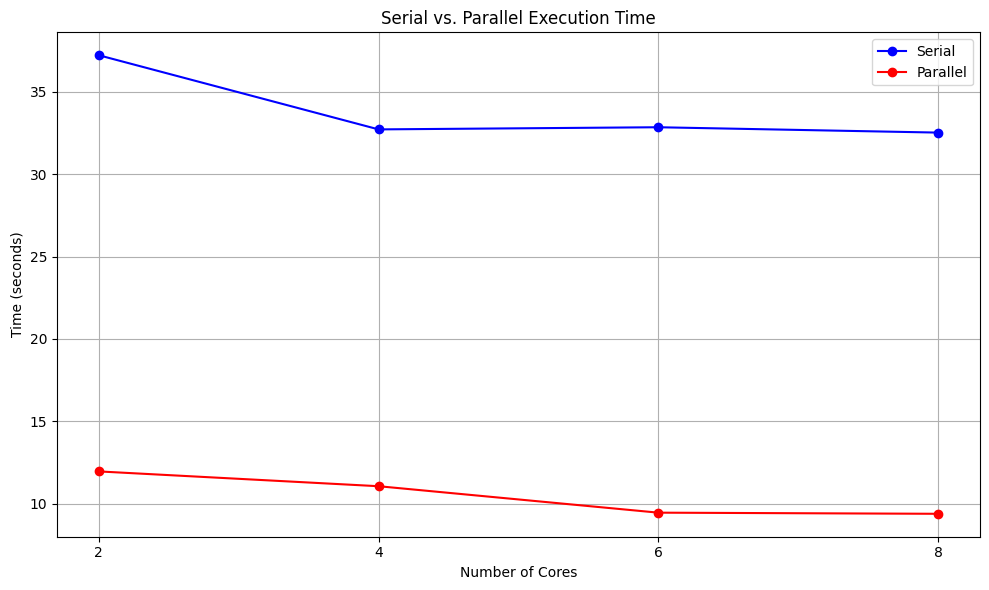


Speedup:
2 core: 3.1124
4 core: 3.3651
6 core: 3.9366
8 core: 3.9653

Efficiency:
2 core: 1.5562
4 core: 0.8413
6 core: 0.6561
8 core: 0.4957


In [1]:
import matplotlib.pyplot as plt

# Data waktu eksekusi serial dan paralel
serial_times = {
    '2 core': 37.2222,
    '4 core': 32.7218,
    '6 core': 32.8524,
    '8 core': 32.5275
}

parallel_times = {
    '2 core': 11.9593,
    '4 core': 11.0611,
    '6 core': 9.4554,
    '8 core': 9.3869
}

# Konversi data menjadi list untuk memudahkan pengolahan
cores = [2, 4, 6, 8]
serial_values = list(serial_times.values())
parallel_values = list(parallel_times.values())

# Plotting waktu eksekusi serial dan paralel
plt.figure(figsize=(10, 6))

plt.plot(cores, serial_values, marker='o', linestyle='-', color='b', label='Serial')
plt.plot(cores, parallel_values, marker='o', linestyle='-', color='r', label='Parallel')

plt.xlabel('Number of Cores')
plt.ylabel('Time (seconds)')
plt.title('Serial vs. Parallel Execution Time')
plt.xticks(cores)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Menghitung speedup
speedup = [serial_values[0] / t for t in parallel_values]

# Menghitung efficiency
efficiency = [s / p for s, p in zip(speedup, cores)]

# Menampilkan hasil speedup dan efficiency
print("\nSpeedup:")
for i, core_count in enumerate(cores):
    print(f"{core_count} core: {speedup[i]:.4f}")

print("\nEfficiency:")
for i, core_count in enumerate(cores):
    print(f"{core_count} core: {efficiency[i]:.4f}")



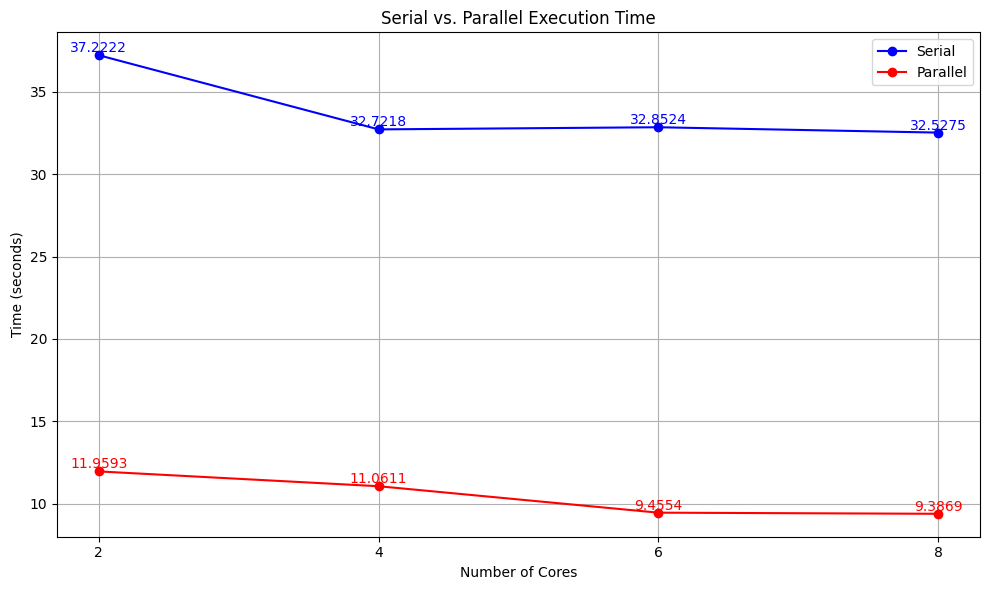


Speedup:
2 core: 3.1124
4 core: 3.3651
6 core: 3.9366
8 core: 3.9653

Efficiency:
2 core: 1.5562
4 core: 0.8413
6 core: 0.6561
8 core: 0.4957


In [20]:
import matplotlib.pyplot as plt

# Data waktu eksekusi serial dan paralel
serial_times = {
    '2 core': 37.2222,
    '4 core': 32.7218,
    '6 core': 32.8524,
    '8 core': 32.5275
}

parallel_times = {
    '2 core': 11.9593,
    '4 core': 11.0611,
    '6 core': 9.4554,
    '8 core': 9.3869
}

# Konversi data menjadi list untuk memudahkan pengolahan
cores = [2, 4, 6, 8]
serial_values = list(serial_times.values())
parallel_values = list(parallel_times.values())

# Plotting waktu eksekusi serial dan paralel
plt.figure(figsize=(10, 6))

plt.plot(cores, serial_values, marker='o', linestyle='-', color='b', label='Serial')
plt.plot(cores, parallel_values, marker='o', linestyle='-', color='r', label='Parallel')

# Menambahkan label waktu eksekusi di setiap titik
for core, serial_time, parallel_time in zip(cores, serial_values, parallel_values):
    plt.text(core, serial_time, f'{serial_time:.4f}', ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(core, parallel_time, f'{parallel_time:.4f}', ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel('Number of Cores')
plt.ylabel('Time (seconds)')
plt.title('Serial vs. Parallel Execution Time')
plt.xticks(cores)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Menghitung speedup
speedup = [serial_values[0] / t for t in parallel_values]

# Menghitung efficiency
efficiency = [s / p for s, p in zip(speedup, cores)]

# Menampilkan hasil speedup dan efficiency
print("\nSpeedup:")
for i, core_count in enumerate(cores):
    print(f"{core_count} core: {speedup[i]:.4f}")

print("\nEfficiency:")
for i, core_count in enumerate(cores):
    print(f"{core_count} core: {efficiency[i]:.4f}")


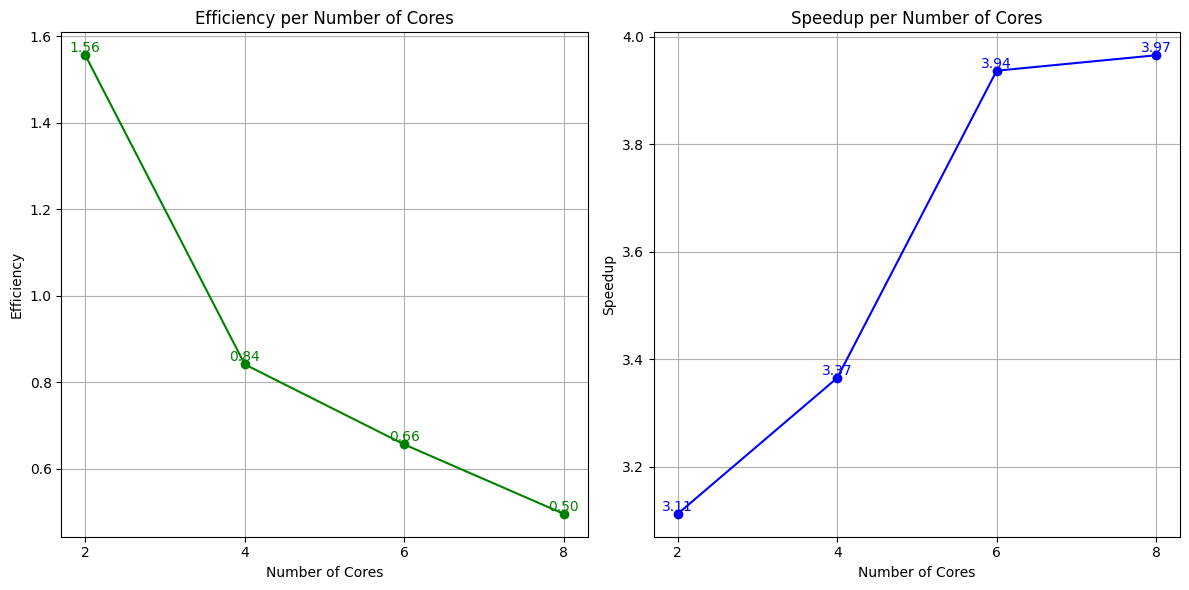

In [1]:
import matplotlib.pyplot as plt

# Data waktu eksekusi serial dan paralel
serial_times = {
    '2 core': 37.2222,
    '4 core': 32.7218,
    '6 core': 32.8524,
    '8 core': 32.5275
}

parallel_times = {
    '2 core': 11.9593,
    '4 core': 11.0611,
    '6 core': 9.4554,
    '8 core': 9.3869
}

# Konversi data menjadi list untuk memudahkan pengolahan
cores = [2, 4, 6, 8]
serial_values = list(serial_times.values())
parallel_values = list(parallel_times.values())

# Plotting waktu eksekusi serial dan paralel
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot untuk Efficiency
efficiency = [(serial_values[0] / (core * parallel_values[i])) for i, core in enumerate(cores)]
plt.plot(cores, efficiency, marker='o', linestyle='-', color='g')
for core, eff in zip(cores, efficiency):
    plt.text(core, eff, f'{eff:.2f}', ha='center', va='bottom', fontsize=10, color='green')
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency')
plt.title('Efficiency per Number of Cores')
plt.xticks(cores)
plt.grid(True)

plt.subplot(1, 2, 2)  # Subplot untuk Speedup
speedup = [serial_values[0] / parallel_values[i] for i, core in enumerate(cores)]
plt.plot(cores, speedup, marker='o', linestyle='-', color='b')
for core, spd in zip(cores, speedup):
    plt.text(core, spd, f'{spd:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup per Number of Cores')
plt.xticks(cores)
plt.grid(True)

plt.tight_layout()
plt.show()

